In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd

In [2]:
df = pd.read_csv('http://www.stat.uchicago.edu/~nicolae/118/data_2018.csv')
df 

,YEAR,STATEFIP,METRO,AGE,SEX,RACE,MARST,VETSTAT,CITIZEN,HISPAN,...,VOTEHOW,VOTEWHEN,VOREGHOW,VOTED,VOREG,VOSUPPWT,MARRSIMPLE,RACESIMPLE,HISPSIMPLE,EDUSIMPLE
0,2018,1,2,48,2,200,4,1,1,0,...,1,1,5,2,99,1957.3134,2,2,0,2
1,2018,1,2,53,2,200,4,1,1,0,...,1,1,3,2,99,1687.7836,2,2,0,3
2,2018,1,2,20,2,200,6,1,1,0,...,1,1,3,2,99,2678.8328,3,2,0,3
3,2018,1,2,61,1,200,1,2,1,0,...,1,1,5,2,99,1753.9945,1,2,0,3
4,2018,1,2,62,2,200,1,1,1,0,...,1,1,97,2,99,1778.5886,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72999,2018,56,4,69,1,100,1,2,1,0,...,1,1,97,2,99,256.5947,1,1,0,4
73000,2018,56,4,60,2,100,1,1,1,0,...,1,1,97,2,99,226.8820,1,1,0,5
73001,2018,56,4,30,1,100,6,1,1,0,...,1,1,97,2,99,313.3757,3,1,0,6
73002,2018,56,4,56,1,100,6,2,1,0,...,1,2,7,2,99,265.6089,3,1,0,4


In [3]:
df["Age Band"] = pd.cut(df["AGE"], 5, labels=["18-32", "32-44", "44-58", "58-72", "72-85"]) #CREATE AGE BAND FEATURE

# Part A: Voter Registration Analysis

So far, we've analyzed our data to draw a big picture of who voted at the polls using demographics such as age, race, ethnicity, and education. Next, we can start to form a big picture of whom actually registers, and doesn't register to vote, and why across key demographics.

In [4]:
df["VOYNOTREG"].value_counts()

99    60955
6      5379
9      2249
1      1432
4       737
2       508
7       476
3       462
97      456
5       204
96      133
98       13
Name: VOYNOTREG, dtype: int64

First, we will drop the 99 (not in universe) because these individuals did register and vote. We are interested in seeing who the people were who did not vote, and why.

In [5]:
nvdf = df[df["VOYNOTREG"] != 99] #not voted df

# One thing we can look it is, for each age group, what is the most popular reason for not voting ?¶

In [6]:
whyNotVoteBasedOnAge = nvdf[["Age Band", "VOYNOTREG"]].groupby("Age Band").agg(pd.Series.mode)
whyNotVoteBasedOnAge.rename(columns={'VOYNOTREG': "Most popular reason for not registering to vote"}, inplace=True)
whyNotVoteBasedOnAge

,Most popular reason for not registering to vote
Age Band,
18-32,6
32-44,6
44-58,6
58-72,6
72-85,6


6 = not interested in politics or the election is the most frequent reason -->

In [7]:
whyNotVoteBasedOnAge.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnAge

,Most popular reason for not registering to vote
Age Band,
18-32,Not interested in politics or the election
32-44,Not interested in politics or the election
44-58,Not interested in politics or the election
58-72,Not interested in politics or the election
72-85,Not interested in politics or the election


The most popular reason for not registering to vote across all age bands was Not being interested in the election or politics. So, the reason for not registering to vote did not vary across ages.

# Next, what is the most popular reason that voters did not register vary across sex ?

In [57]:
nvdf.loc[df.SEX == 1, "SEX"] = "Male"
nvdf.loc[df.SEX == 2, "SEX"] = "Female"

In [59]:
whyNotVoteBasedOnSex = nvdf[["SEX", "VOYNOTREG"]].groupby("SEX").agg(pd.Series.mode)
whyNotVoteBasedOnSex.rename(columns={'VOYNOTREG': "Most popular reason for not registering to vote"}, inplace=True)
whyNotVoteBasedOnSex.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnSexz

NameError: name 'whyNotVoteBasedOnSexz' is not defined

6 is also the most frequent reason for not voting across the genders 

In [10]:
whyNotVoteBasedOnSex.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnSex

,Most popular reason for not voting
SEX,
Female,99
Male,99


The most popular reason for not registering to vote did not vary across genders. Both most males and most females said they did not register to vote because they were not interested in the election or politics

# Finally, looking at the most popular reason for why people did not register to vote across RACE:

In [50]:
whyNotVoteBasedOnRace = df[["NEWRACE", "VOYNOTREG"]].groupby("NEWRACE").agg(pd.Series.mode)
whyNotVoteBasedOnRace.rename(columns={'VOYNOTREG': "Most popular reason for not voting"}, inplace=True)
whyNotVoteBasedOnRace

,Most popular reason for not voting
NEWRACE,
Asian or Pacific Islander,99
Black,99
More than one race,99
Native American,99
White,99


The most popular reason for not registering to vote did not vary across races. All said they did not register to vote because they were not interested in the election or politics.

In [13]:
whyNotVoteBasedOnRace.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnRace

,Most popular reason for not voting
RACESIMPLE,
1,99
2,99
3,99
4,99
5,99


# Voter Turnout Analysis: (Part B)

# "VOTED" 

varied across the different factors. 

# How many people voted?

In [14]:
df["VOTED"].value_counts()

2    48337
1    24667
Name: VOTED, dtype: int64

In [15]:
#change the VOTED values to binary values (0 for didn't vote, 1 for did vote) to make it easier for us to compute averages.

In [16]:
df.loc[df.VOTED == 1, "VOTED"] = 0

In [17]:
df.loc[df.VOTED == 2, "VOTED"] = 1

# What ages voted the most and the least?

In [18]:
df["Age Band"] = pd.cut(df["AGE"], 5)

In [19]:
ageVotes = df[["Age Band", "VOTED"]].groupby(["Age Band"], as_index=False).mean().sort_values(by="VOTED",  ascending=False)

In [20]:
ageVotes.set_index("Age Band", drop=True, inplace=True)

Text(0.5, 1.0, 'Votership by Age Group')

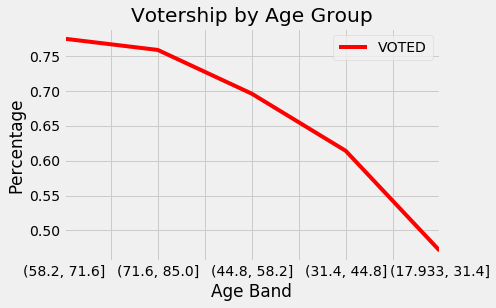

In [21]:
ageVotesGraph = ageVotes.plot(color="red")
ageVotesGraph.set_ylabel("Percentage")
ageVotesGraph.set_title("Votership by Age Group")

As we can see from the above graph, those in the age range of 58 to 72 had the highest votership of almost 80%, whereas those in the age of 18 to 32 had the lowest voter turnout.negative correlation bewteen age group and votership

Potential solutions: 
1. To increase voter turnout amongst the age group of 18-32 a possible solution could be to target college students in densely packed campuses by increasing education and awareness of the importance of voting by holding modules and education programs leading up to elections

# How does votership break down by race ?

In [22]:
df["RACE"].value_counts()

White                        60827
Black                         7012
Native American               3078
More than one race            1179
Asian or Pacific Islander      908
Name: RACE, dtype: int64

We can already see that we have a large pool of values for the RACE feature that makes analysis tedious. To simplify our analysis, we will clean our data to focus on the following races: White (100), Black (200), Asian (651, 652) and Native American (300), and more than one race (801-830). Note that we can also use the RACESIMPLE feature to get this information without doing any further work, but for demonstration purposes, we will try cleaning the data ourselves. We will create this information in a column called NEWRACE.

In [23]:
df["NEWRACE"] = df["RACE"]
df["NEWRACE"] = df["NEWRACE"].replace([100], "White")
df["NEWRACE"] = df["NEWRACE"].replace([200], "Black")
df["NEWRACE"] = df["NEWRACE"].replace([651, 652], "Asian or Pacific Islander")
df["NEWRACE"] = df["NEWRACE"].replace([300], "Native American")
df["NEWRACE"] = df["NEWRACE"].replace([801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 830], "More than one race")

In [24]:
raceVotes = df[["NEWRACE", "VOTED"]].groupby(["NEWRACE"], as_index=False).mean().sort_values(by="VOTED", ascending=False)
raceVotes.rename(columns={"NEWRACE": "RACE"}, inplace=True) #rename NEWRACE to clear ambigiouity
raceVotes.set_index("RACE", drop=True, inplace=True)
raceVotes

,VOTED
RACE,
Black,0.672847
White,0.670031
More than one race,0.604750
Native American,0.558155
Asian or Pacific Islander,0.475771


Text(0.5, 1.0, 'Votership by Race')

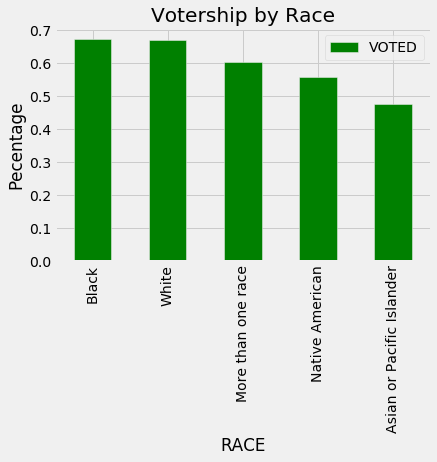

In [25]:
raceVotesGraph = raceVotes.plot.bar(color="green")
raceVotesGraph.set_ylabel("Pecentage")
raceVotesGraph.set_title("Votership by Race")

We can conclude from our analysis of race that those who or Black and White are equally as likely to vote, each voting at about a 68% rate. Native Americans are the least likely to vote, with less than half of all Native Americans voting. Asian Americans also fall behind in votership, with 45% of their population abstaining from the polls. Those who hail from a background of more than one race are more likely to vote than Asian and Native Americans, but less likely than Black or White people.

Solutions: 
 

# What does votership look like when considering Hispanic/Non-Hispanic ?

As a corollary to race, we should also look at how many of those with a Hispanic background did not vote, as they are historically under-educated, and thus I predict their votership numbers are down in comparison to Non-Hispanics. 0 = Non-Hispanics, 1 = Hispanics

In [26]:
df["HISPSIMPLE"].value_counts()

0    66371
1     6633
Name: HISPSIMPLE, dtype: int64

In [27]:
hispVotes = df[["HISPSIMPLE", "VOTED"]].groupby(["HISPSIMPLE"], as_index=False).mean()
hispVotes.rename(columns={"HISPSIMPLE": "Hispanic Ethnicity", "VOTED": "Voted"}, inplace=True)
hispVotes.replace([0], "Not Hispanic", inplace=True)
hispVotes.replace([1], "Hispanic", inplace=True)
hispVotes.set_index("Hispanic Ethnicity", drop=True, inplace=True)
hispVotes

,Voted
Hispanic Ethnicity,
Not Hispanic,0.675280
Hispanic,0.530378


Text(0.5, 1.0, 'Votership across Hispanic ethnicity')

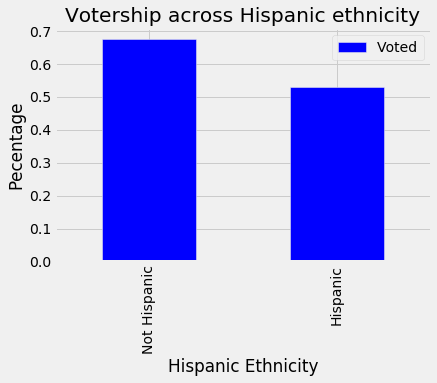

In [28]:
hispVotesGraph = hispVotes.plot.bar(color="blue")
hispVotesGraph.set_ylabel("Pecentage")
hispVotesGraph.set_title("Votership across Hispanic ethnicity")

As predicted, Hispanics were (14%) less likely to vote than their Non-Hispanic counterparts

Solutions: 
    1. 

# How does martial status affect votership?

In [29]:
df["MARRSIMPLE"].value_counts()

1    41508
3    17754
2    13742
Name: MARRSIMPLE, dtype: int64

In [30]:
marrVotes = df[["MARRSIMPLE", "VOTED"]].groupby(["MARRSIMPLE"], as_index=False).mean().sort_values(by="VOTED",  ascending=False)

In [31]:
marrVotes['MARRSIMPLE'].replace([1],'Married', inplace=True)
marrVotes['MARRSIMPLE'].replace([2],'Divorced',inplace=True)
marrVotes['MARRSIMPLE'].replace([3],'Single',inplace=True)

In [32]:
marrVotes.set_index("MARRSIMPLE", drop=True, inplace=True)

Text(0.5, 1.0, 'Votership across martial status')

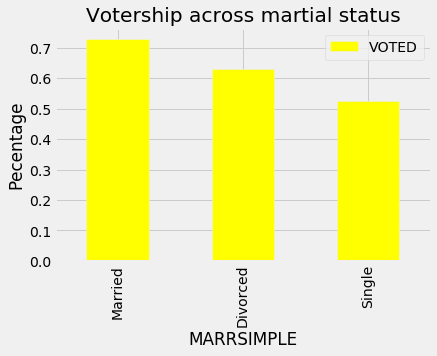

In [33]:
marrVotesGraph = marrVotes.plot.bar(color="yellow")
marrVotesGraph.set_ylabel("Pecentage")
marrVotesGraph.set_title("Votership across martial status")

Married people are more than 73% likely to vote, only 52% are voting amongst young/single poeple --> room for improvement Divorced = 63% Solutions:

People who are single are most likely younger --> target singles who are younger i.e. young professionals or students

# "VOTEWHEN"

In [34]:
df["VOTEWHEN"].value_counts()

1     30524
99    24667
2     17543
97      149
96       88
98       33
Name: VOTEWHEN, dtype: int64

In [44]:
vwdf = df[df["VOTEWHEN"] < 3] # create a new dataframe from the original dataframe and assign it to a variable so we dont modify the original dataset. 
#Get all the data for those that voted on election day OR before election date.Z

In [36]:
vwdf["VOTEWHEN"].value_counts()

1    30524
2    17543
Name: VOTEWHEN, dtype: int64

# How does when an individual voted differ by age ?

In [47]:
vwdf[["Age Band", "VOTEWHEN"]].groupby(["Age Band"]).agg(pd.Series.mode)

,VOTEWHEN
Age Band,
"(17.933, 31.4]",1
"(31.4, 44.8]",1
"(44.8, 58.2]",1
"(58.2, 71.6]",1
"(71.6, 85.0]",1


Across all age groups, **most people voted on the day of the election.**

# How does when an individual voted differ by race ?

In [49]:
vwdf[["NEWRACE", "VOTEWHEN"]].groupby(["NEWRACE"]).agg(pd.Series.mode)

,VOTEWHEN
NEWRACE,
Asian or Pacific Islander,1
Black,1
More than one race,1
Native American,1
White,1


Across all races, most people voted on the day of the election.

# Voting by Education (Part C)

# How does education affect votership ?

In [38]:
df["EDUSIMPLE"].value_counts()

2    20722
5    16018
3    13586
4     7809
6     6884
1     5436
7     2449
0      100
Name: EDUSIMPLE, dtype: int64

In [39]:
df["NEWEDU"] = df["EDUSIMPLE"]
df["NEWEDU"].replace(0, "No School", inplace=True)
df["NEWEDU"].replace(1, "Some school, no diploma", inplace=True)
df["NEWEDU"].replace(2, "GED", inplace=True)
df["NEWEDU"].replace(3, "Some college, no degree", inplace=True)
df["NEWEDU"].replace(4, "Associate", inplace=True)
df["NEWEDU"].replace(5, "Bachelors", inplace=True)
df["NEWEDU"].replace(6, "Masters", inplace=True)
df["NEWEDU"].replace(7, "Doctorate", inplace=True)
eduVotes = df[["NEWEDU", "VOTED"]].groupby(["NEWEDU"], as_index=False).mean().sort_values(by="VOTED", ascending=False)
eduVotes.rename(columns={"NEWEDU": "Level of Education", "VOTED": "Voted"}, inplace=True)
eduVotes.set_index("Level of Education", drop=True, inplace=True)
eduVotes

,Voted
Level of Education,
Doctorate,0.870559
Masters,0.854736
Bachelors,0.795293
Associate,0.693687
"Some college, no degree",0.653467
GED,0.543143
"Some school, no diploma",0.368837
No School,0.270000


Text(0.5, 1.0, 'Votership across education levels')

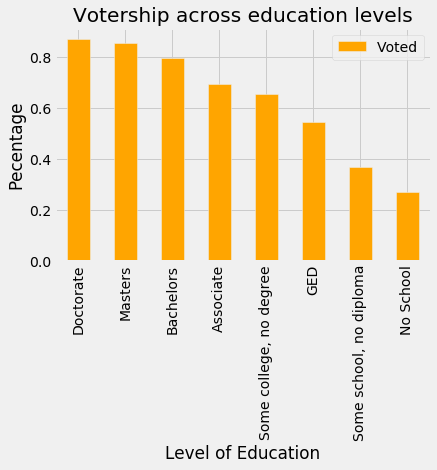

In [40]:
eduVotesGraph = eduVotes.plot.bar(color="orange")
eduVotesGraph.set_ylabel("Pecentage")
eduVotesGraph.set_title("Votership across education levels")

As the level of education increases, voter turnout increases.

Solutions: 
    1. focus on people who do a majority of unskilled labor i.e. blue collar workers (fastfood workers etc.) (bc probably less educated) and less on white collar workers i.e. professors, engineers etc. 

# How does education influence the reasons for not voting?

In [41]:
 #to remove all nulls and not in universe
whyNotVoteBasedOnEdu = df[df["VOYNOTREG"] < 96]
whyNotVoteBasedOnEdu

,YEAR,STATEFIP,METRO,AGE,SEX,RACE,MARST,VETSTAT,CITIZEN,HISPAN,...,VOTED,VOREG,VOSUPPWT,MARRSIMPLE,RACESIMPLE,HISPSIMPLE,EDUSIMPLE,Age Band,NEWRACE,NEWEDU
10,2018,1,2,76,Female,Black,1,1,1,0,...,0,1,1427.0079,1,2,0,1,"(71.6, 85.0]",Black,"Some school, no diploma"
52,2018,1,2,76,Female,White,4,1,1,0,...,0,1,1820.1696,2,1,0,2,"(71.6, 85.0]",White,GED
71,2018,1,2,21,Male,White,6,1,1,100,...,0,1,1818.1702,3,1,1,4,"(17.933, 31.4]",White,Associate
72,2018,1,2,19,Female,White,6,1,1,100,...,0,1,1741.3746,3,1,1,2,"(17.933, 31.4]",White,GED
89,2018,1,2,26,Female,Black,6,1,1,0,...,0,1,2474.3503,3,2,0,5,"(17.933, 31.4]",Black,Bachelors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72981,2018,56,4,58,Male,White,6,1,1,0,...,0,1,341.9449,3,1,0,1,"(44.8, 58.2]",White,"Some school, no diploma"
72983,2018,56,4,28,Female,White,1,1,1,0,...,0,1,341.3270,1,1,0,1,"(17.933, 31.4]",White,"Some school, no diploma"
72990,2018,56,4,52,Female,White,1,1,1,0,...,0,1,255.0748,1,1,0,6,"(44.8, 58.2]",White,Masters
72991,2018,56,4,57,Male,White,1,1,1,0,...,0,1,278.4728,1,1,0,5,"(44.8, 58.2]",White,Bachelors


In [42]:
whyNotVoteBasedOnEdu_table = whyNotVoteBasedOnEdu[["EDUSIMPLE", "VOYNOTREG"]].groupby(["EDUSIMPLE"]).agg(pd.Series.mode)
whyNotVoteBasedOnEdu_table.rename(columns={'VOYNOTREG': "Most popular reason for not voting"}, inplace=True)
whyNotVoteBasedOnEdu_table

,Most popular reason for not voting
EDUSIMPLE,
0,4
1,6
2,6
3,6
4,6
5,6
6,6
7,6


In [43]:
The most frequent reason is 

SyntaxError: invalid syntax (<ipython-input-43-d8c9dec48a17>, line 1)

# Part A: Voter Registration Analysis

So far, we've analyzed our data to draw a big picture of who voted at the polls using demographics such as age, race, ethnicity, and education. Next, we can start to form a big picture of whom actually registers, and doesn't register to vote, and why across key demographics.

In [ ]:
df["VOYNOTREG"].value_counts()

First, we will drop the 99 (not in universe) because these individuals did register and vote. We are interested in seeing who the people were who did not vote, and why.

In [ ]:
df = df[df["VOYNOTREG"] != 99]

# One thing we can look it is, for each age group, what is the most popular reason for not voting ?¶

In [ ]:
whyNotVoteBasedOnAge = df[["Age Band", "VOYNOTREG"]].groupby("Age Band").agg(pd.Series.mode)
whyNotVoteBasedOnAge.rename(columns={'VOYNOTREG': "Most popular reason for not voting"}, inplace=True)
whyNotVoteBasedOnAge

6 = not interested in politics or the election is the most frequent reason -->

In [ ]:
whyNotVoteBasedOnAge.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnAge

The most popular reason for not registering to vote across all age bands was Not being interested in the election or politics. So, the reason for not registering to vote did not vary across ages.

# Next, what is the most popular reason that voters did not register vary across sex ?

In [ ]:
df.loc[df.SEX == 1, "SEX"] = "Male"
df.loc[df.SEX == 2, "SEX"] = "Female"

In [ ]:
whyNotVoteBasedOnSex = df[["SEX", "VOYNOTREG"]].groupby("SEX").agg(pd.Series.mode)
whyNotVoteBasedOnSex.rename(columns={'VOYNOTREG': "Most popular reason for not voting"}, inplace=True)
whyNotVoteBasedOnSex

6 is also the most frequent reason for not voting across the genders 

In [ ]:
whyNotVoteBasedOnSex.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnSex

The most popular reason for not registering to vote did not vary across genders. Both most males and most females said they did not register to vote because they were not interested in the election or politics.

# Finally, looking at the most popular reason for why people did not register to vote across RACE: 

In [ ]:
whyNotVoteBasedOnRace = df[["RACESIMPLE", "VOYNOTREG"]].groupby("RACESIMPLE").agg(pd.Series.mode)
whyNotVoteBasedOnRace.rename(columns={'VOYNOTREG': "Most popular reason for not voting"}, inplace=True)
whyNotVoteBasedOnRace

The most popular reason for not registering to vote did not vary across races. All said they did not register to vote because they were not interested in the election or politics.

In [ ]:
whyNotVoteBasedOnRace.replace([6], "Not interested in politics or the election", inplace=True)
whyNotVoteBasedOnSex

In [ ]:
# have to label all graphs x,y and title 
# part b add: Is there a strong relationship between voter registration and voter turnout?
#How do voting registration patterns vary by state? Which states had the highest percentage of those surveyed who did not vote?

CONC: reasons why people are not registering to vote did not vary across the different factors - they all are not interested in politics or the elciton 